In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from pathlib import Path
from skimage.io.collection import alphanumeric_key
import math

## Load reconstructed data corresponding to user's predefined coordinates

In [2]:
ds_name = "SST"
postfix = ".nc"
data_path = "./get_data_hier_SST.051001-051912" # path to folder where the data file is located
filenames = filenames = sorted(
            glob.glob(os.path.join(data_path, f"*{postfix}")), key=alphanumeric_key
        )
print(filenames)
hier_ds_cut = xr.open_mfdataset(
    filenames,
    combine="by_coords",
    chunks={"time": 1, "z_t": 1, "nlat": 200, "nlon": 200},
)

# Since nan/missing values are automatically replaced by a very large number,
# it is necessary to replace those excessive values with a reasonable value.
hier_ds_cut["SST"] = xr.where(hier_ds_cut["SST"] > 1e10, -3, hier_ds_cut["SST"]) 

['./get_data_hier_SST.051001-051912/SST.051001-051912-reconstruction.nc']


## Visualization

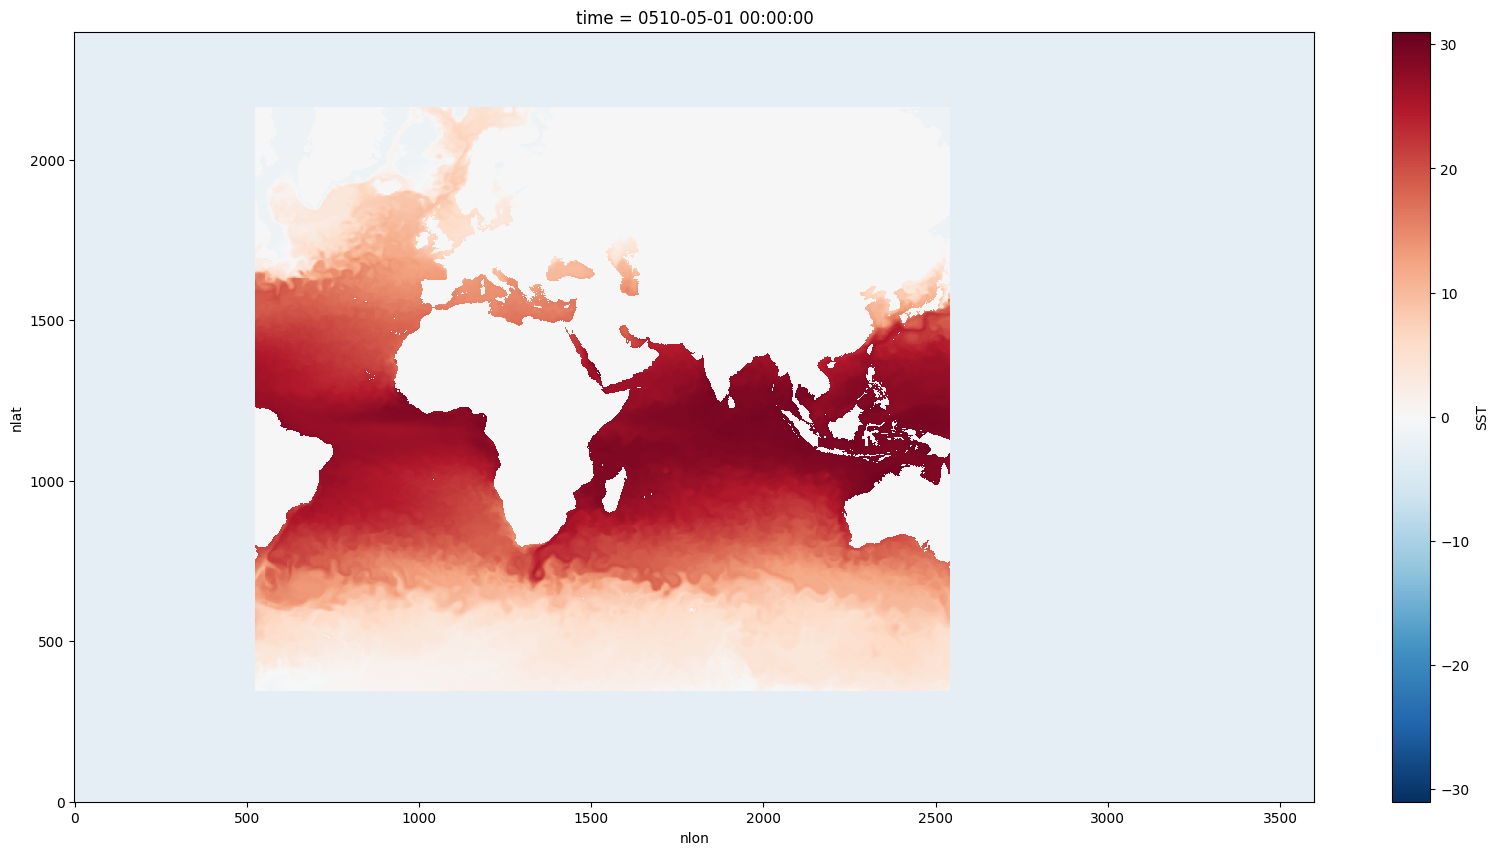

In [3]:
time = 3
hier_ds_cut["SST"][time].plot(aspect=2, size=10)